# Housing Price Predication using Linear Regression

> ### Machine Learning Assignments of Linear Regression for Housing Price

In this Project we will make Linear Regression model for simple Housing prizing problem using Python. In this Project we are not using any machine learning liberary ,but insteed we develop function by self. This way we can learn very basic way to implement machine learning. 

In this project first we are developing machine learning function for linear regression named as LinearRegression(). In Next step we Load training data in function to train and then we check how training being done. 


# Import Useful Liberary :

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from housingdata import *

## Some Basic Information for Naming Convention Used :
- X = Features,
- Y = Resposes,
- W = weights - Learning Parameter,
- b = bias - Learning Parameter
- α = Learning Rate,
- m = Training set size

## Initialize Learning Parameter :

Here, we initialize learning parameter W and b.

In [11]:
def initialize_parameters(n_x,method):   
    if method == "Linear":
        W = np.zeros((1,n_x))
        b = 0
    elif method == "Logistic":
        W = np.zeros((1,n_x))
        b = 0
    else :
        print "Error : Define method in initialize parameter"
    return W, b

## Feature Normalize : 

In [12]:
def feature_normalization(X):
    (row, col) = X.shape
    for f in range(1,row):
        X[f,:] = (X[f,:]- min(X[f,:].T))/(max(X[f,:].T)- min(X[f,:].T))
        assert(X.shape==(row,col)),"Error in size match : feature_normalization"
    return X

## Hyponthsis and Cost Function :
> h(X) = b + W(1) * X(1) + W(2) * X(2) + W(3) * X(3) ...
> Cost_Function = ( h(X) - Y )**2

In [13]:
def cost_function(X, Y, W, b, method):
    ## where X shape is (input_size, no_examples)
    (n,m) = X.shape
    if method == "Linear":
        hyponthsis_function = np.dot(W,X) + b
        cost = np.square(hyponthsis_function - Y)
        error = np.sum(cost /(m),axis=1)
    elif method == "Logistic":
        Z = np.dot(W,X) + b
        hyponthsis_function = 1/(1+exp(-Z))
        cost = - np.dot(Y,np.log(hyponthsis_function).T) - np.dot(1 - Y,np.log(1 - hyponthsis_function).T) 
        error = np.sum(cost /(m),axis=1)
    else:
        print "Error In Cost Function : No method Found"
    return hyponthsis_function, cost, error

## Gradient Decent :
> grad J = (1/2) * (h(X) - Y)
 
>  b := b - (α / 2 * m) (**∑** (h(X) - Y) * X(i))
 
>  W(i) := w(i) - (α / 2 * m) (**∑** (h(X) - Y) * X(i))

In [14]:
def gradient_descent(X, Y, W, b, itertions, learning_rate, method):
    (n,m) = X.shape
    for iteration in range(itertions):
        if method == "Linear":
            dJ = np.dot(W,X) + b - Y
            db = np.sum(dJ, axis=0)/(2*m)
            dW = np.sum(np.dot(dJ,X.T), axis=0)/(2*m)
        elif method == "Logistic":
            Z = np.dot(W,X) + b
            dJ = Y - Z
            db = np.sum(dJ, axis=0)/m
            dW = np.sum(np.dot(dJ,X.T), axis=0)/m
        else:
            print "Error in gradient descent: No method Found"
        W = W - learning_rate * dW
        b = b - learning_rate * db
    #print dJ.shape
    assert(dJ.shape == (W.shape[0],X.shape[1]))
    assert(db.shape == b.shape)
    assert(dW.shape == W.shape)
    return W,b

By implementing this function we make LinearRegression function and training to get optimal Learning Parameters b and W.

## Visualization Function :  

I have implemented simple visualization function.

In [15]:
def visualization(x, y, hf):
    fig, handle = plt.subplots()
    handle.plot(x, y, "yo", x, hf, "--k")
    #handle.plot(x, hf, color='red')
    #handle.scatter(x, y)
    fig.show()
    return None

## Final Linear Regression function : 

In [16]:
def linear_regression(X, Y, itertions, learning_rate, method = "Linear"):
    (row, col) = X.shape
    (W, b) = initialize_parameters(row,method)
    X = feature_normalization(X)
    (W,b) = gradient_descent(X, Y, W, b, itertions, learning_rate, method)
    hyponthsis_function, cost, error = cost_function(X, Y, W, b, method)
    return hyponthsis_function, error, W, b

## Data Reading and Function Call : 

In [17]:
X, Y, Xv, Yv = housingPrice()
hyponthsis_function, error, W, b = linear_regression(X, Y, itertions=1000, learning_rate=0.5, method="Linear")
print Y[0,5], hyponthsis_function[0,5]

299900.0 300066.8829121685


## Visualizing Trained model : 

C:\Users\Harsh Chaudhari\Anaconda2\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


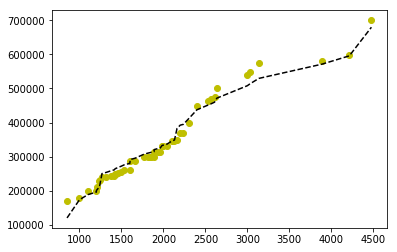

In [18]:
x = Xv[1,:].T
x = np.array(x)
x = x.flatten()
y = Yv.T
y = np.array(y)
y = y.flatten()
hf, error, W, b = linear_regression(Xv, Yv, itertions=100, learning_rate=0.5, method="Linear")
hf = np.array(hf)
hf = hf.flatten()
#print X,X.shape,hyponthsis_function.shape
A = visualization(x, y, hf)

This Way we can sucessfully predict Housing price using machine learning 